In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
n = 1_000_000
X = np.random.randn( n, ) + 10
y = 5 + 2 * X + np.random.randn( n, ) * 2
# binary_y = ( 1 / (1 + np.exp(-y)) > 0.8 ) * 1
binary_y = ( y > np.percentile( y, 80 ) ) * 1
m = np.random.uniform( 0.6, 1.2, n )
X_const = np.vstack( [X, np.ones(n)] ).T

In [186]:
def scale_X_by_m( m, X, y ):
    X_scaled = X * m[:, None]
    beta_scaled = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y
    return beta_scaled

def pred_X_by_m( m, X, beta ):
    X_scaled = X * m[:, None]
    preds = X_scaled @ beta
    return preds

def scale_y_by_m( m, X, y ):
    y_scaled = y / m
    beta_scaled = np.linalg.inv(X.T @ X) @ X.T @ y_scaled
    return beta_scaled

def pred_y_by_m( m, X, beta ):
    preds = X @ beta
    preds_scaled = preds * m
    return preds_scaled

## Classification

### Use m to scale X

In [187]:
beta = scale_X_by_m( m, X_const, binary_y )
print( f"Model Preds Mean: {np.mean( pred_X_by_m( m, X_const, beta ) )}" )
print( f"Actual Mean: {np.mean( binary_y )}" )

Model Preds Mean: 0.19288320256396813
Actual Mean: 0.2


### Use m to scale y

In [188]:
beta = scale_y_by_m( m, X_const, binary_y )
print(f"Model Preds Mean: {np.mean( pred_y_by_m( m, X_const, beta ) )}" )
print(f"Actual Mean: {np.mean( binary_y )}" )

Model Preds Mean: 0.20792300565465974
Actual Mean: 0.2


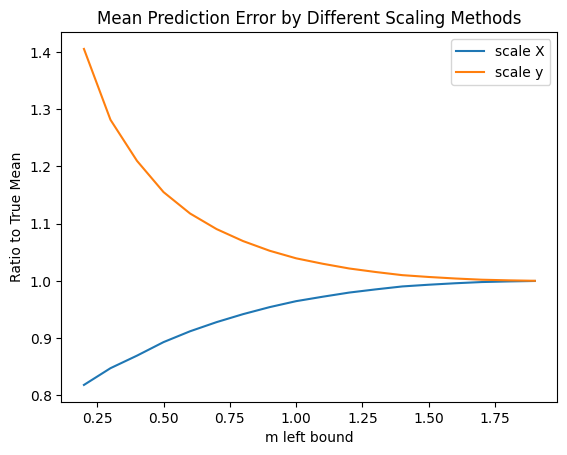

In [189]:
records = []
for m_left in np.arange( 0.2, 2, 0.1 ):
    m = np.random.uniform( m_left, 2, n )
    # scale X
    beta = scale_X_by_m( m, X_const, binary_y )
    scale_x_mean = np.mean( pred_X_by_m( m, X_const, beta ) )
    # scale y
    beta = scale_y_by_m( m, X_const, binary_y )
    scale_y_mean = np.mean( pred_y_by_m( m, X_const, beta ) )
    # true mean
    true_mean = np.mean( binary_y )
    records.append( (m_left, scale_x_mean / true_mean, scale_y_mean / true_mean, true_mean) )
    
df = pd.DataFrame( {
    "m_left": [r[0] for r in records],
    "scale_x_mean_ratio": [r[1] for r in records],
    "scale_y_mean_ratio": [r[2] for r in records],
    "true_mean": [r[3] for r in records],
})

plt.plot( df['m_left'], df['scale_x_mean_ratio'], label='scale X' )
plt.plot( df['m_left'], df['scale_y_mean_ratio'], label='scale y' )
plt.legend()
plt.title("Mean Prediction Error by Different Scaling Methods")
plt.xlabel("m left bound")
plt.ylabel("Ratio to True Mean")
plt.show()

In [190]:
res = pd.DataFrame( X_const, columns=['X', 'const'])
res['y'] = y
res['binary_y'] = binary_y

m = np.random.uniform( 0.6, 1.2, n )
beta_scale_x = scale_X_by_m( m, X_const, binary_y )
res['scale_X_pred'] = pred_X_by_m( m, X_const, beta_scale_x )
beta_scale_y = scale_y_by_m( m, X_const, binary_y )
res['scale_y_pred'] = pred_y_by_m( m, X_const, beta_scale_y )
res['X_bin'] = pd.qcut( res['X'], 100, labels=False )
res['m'] = m

<Axes: xlabel='X_bin'>

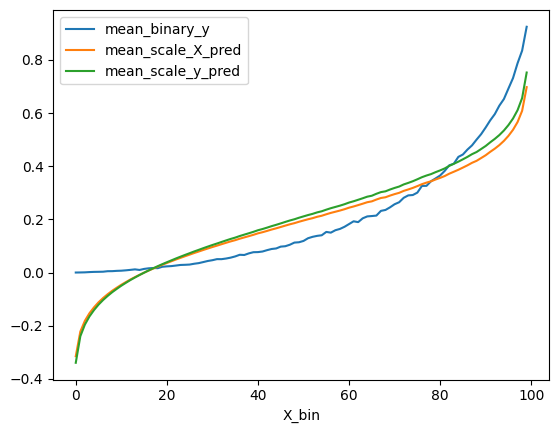

In [191]:
def func( df ):
    bin_scaled_y = np.sum( df['binary_y'] ) / np.sum( df['m'] )
    bin_pred = df[ ['X', 'const'] ] @ beta
    
    return pd.Series({
        'mean_binary_y': df['binary_y'].mean(),
        'mean_scale_X_pred': df['scale_X_pred'].mean(),
        'mean_scale_y_pred': df['scale_y_pred'].mean(),
        # 'bin_scaled_y': bin_scaled_y,
        # 'bin_pred': bin_pred.mean(),
    })

res.groupby( 'X_bin', observed=True ).apply(
    func, include_groups=False
).plot()

## Regression

### Use m to scale X

In [192]:
beta = scale_X_by_m( m, X_const, y )
print( f"Model Preds Mean: {np.mean( pred_X_by_m( m, X_const, beta ) )}" )
print( f"Actual Mean: {np.mean( y )}" )

Model Preds Mean: 24.105958630382055
Actual Mean: 24.998698189191284


### Use m to scale y

In [193]:
beta = scale_y_by_m( m, X_const, y )
print(f"Model Preds Mean: {np.mean( pred_y_by_m( m, X_const, beta ) )}" )
print(f"Actual Mean: {np.mean( y )}" )

Model Preds Mean: 25.99216879492325
Actual Mean: 24.998698189191284


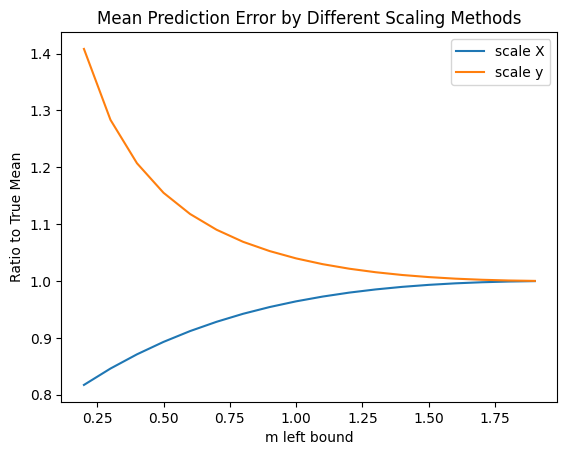

In [194]:
records = []
for m_left in np.arange( 0.2, 2, 0.1 ):
    m = np.random.uniform( m_left, 2, n )
    # scale X
    beta = scale_X_by_m( m, X_const, y )
    scale_x_mean = np.mean( pred_X_by_m( m, X_const, beta ) )
    # scale y
    beta = scale_y_by_m( m, X_const, y )
    scale_y_mean = np.mean( pred_y_by_m( m, X_const, beta ) )
    # true mean
    true_mean = np.mean( y )
    records.append( (m_left, scale_x_mean / true_mean, scale_y_mean / true_mean, true_mean) )
    
df = pd.DataFrame( {
    "m_left": [r[0] for r in records],
    "scale_x_mean_ratio": [r[1] for r in records],
    "scale_y_mean_ratio": [r[2] for r in records],
    "true_mean": [r[3] for r in records],
})

plt.plot( df['m_left'], df['scale_x_mean_ratio'], label='scale X' )
plt.plot( df['m_left'], df['scale_y_mean_ratio'], label='scale y' )
plt.legend()
plt.title("Mean Prediction Error by Different Scaling Methods")
plt.xlabel("m left bound")
plt.ylabel("Ratio to True Mean")
plt.show()

## Appendix

In [195]:
beta_real = np.linalg.inv(X_const.T @ X_const) @ X_const.T @ y
print(f"Model Preds Mean (m on left): {np.mean( X_const @ beta_real )}" )
print(f"Actual Mean: {np.mean( y )}" )

Model Preds Mean (m on left): 24.998698189191387
Actual Mean: 24.998698189191284
